## Support Vector Machine (SVM) 
It is a discriminative classifier capable of performing classification, regression and even outlier detection. The linear SVM classifier separates the two classes by drawing line between them also called hyperplane or decision boundary. It can define both a linear or a non-linear decision boundary by using kernel functions. All the data points that fall on one side of the line will be labeled as one class and all the points that fall on the other side will be labeled as the second. <br>
It draws a margin around the decision boundary to separate the vectors from the decision boundary, as much as possible which gives us more confidence in our predictions. Because the vectors are at least the length of the margin away from the decision boundary, there’s less ambiguity during classification. The position of the margin is defined using the vectors that are closest to the decision boundary. Support vectors are the vectors that lie on top of the margin.
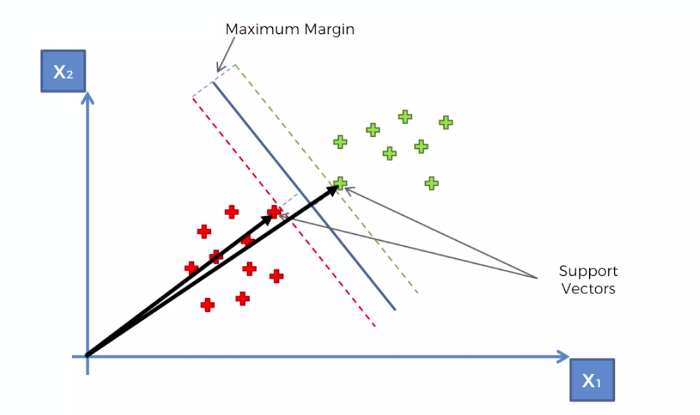

In [1]:
# importing libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
def generate_random_dataset(size):
    """ Generate a random dataset and that follows a quadratic  distribution
    """
    x = []
    y = []
    target = []
    for i in range(size):
        # class zero
        x.append(np.round(random.uniform(0, 2.5), 1))
        y.append(np.round(random.uniform(0, 20), 1))
        target.append(0)
        # class one
        x.append(np.round(random.uniform(1, 5), 2))
        y.append(np.round(random.uniform(20, 25), 2))
        target.append(1)
        x.append(np.round(random.uniform(3, 5), 2))
        y.append(np.round(random.uniform(5, 25), 2))
        target.append(1)
    df_x = pd.DataFrame(data=x)
    df_y = pd.DataFrame(data=y)
    df_target = pd.DataFrame(data=target)
    data_frame = pd.concat([df_x, df_y], ignore_index=True, axis=1)
    data_frame = pd.concat([data_frame, df_target], ignore_index=True, axis=1)
    data_frame.columns = ['x', 'y', 'target']
    return data_frame

In [3]:
# Generate dataset
size = 100
dataset = generate_random_dataset(size)
features = dataset[['x', 'y']]
label = dataset['target']

In [4]:
# Hold out 20% of the dataset for training
test_size = int(np.round(size * 0.2, 0))
# Split dataset into training and testing sets
x_train = features[:-test_size].values
y_train = label[:-test_size].values
x_test = features[-test_size:].values
y_test = label[-test_size:].values

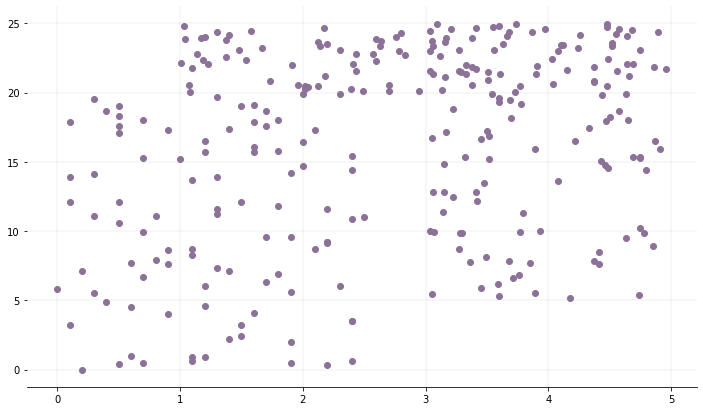

In [5]:
# Plotting the training set
fig, ax = plt.subplots(figsize=(12, 7))
# removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], color="#8C7298")
plt.show()

There’s a little space between the two groups of data points. But closer to the center, it’s not clear which data point belongs to which class.<br>
A quadratic curve might be a good candidate to separate these classes. So let’s fit an SVM with a second-degree polynomial kernel.

In [6]:
model = svm.SVC(kernel='poly', degree=2) ## "Support Vector Classifier"
model.fit(x_train, y_train)

SVC(degree=2, kernel='poly')

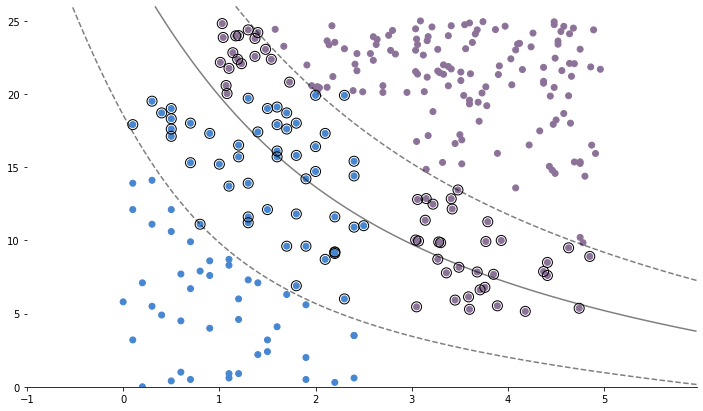

In [7]:
# plot the decision boundary and margins
fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [8]:
# calculate the accuracy of this model against the testing set
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("2nd degree polynomial Kernel\nAccuracy (normalized): " + str(accuracy_poly))

2nd degree polynomial Kernel
Accuracy (normalized): 0.75


In [9]:
# let's see if a more simplistic approach could have solved our problem by fitting an SVM with a linear kernel
model = svm.SVC(kernel='linear')
model.fit(x_train, y_train)

SVC(kernel='linear')

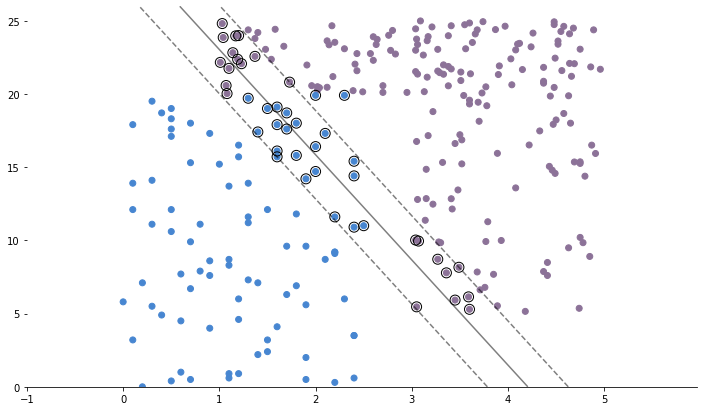

In [14]:
# plot the decision boundary and margins
fig, ax = plt.subplots(figsize=(12, 7))
# Removing to and right border
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
# Create grid to evaluate model
xx = np.linspace(-1, max(features['x']) + 1, len(x_train))
yy = np.linspace(0, max(features['y']) + 1, len(y_train))
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
train_size = len(features[:-test_size]['x'])
# Assigning different colors to the classes
colors = y_train
colors = np.where(colors == 1, '#8C7298', '#4786D1')
# Plot the dataset
ax.scatter(features[:-test_size]['x'], features[:-test_size]['y'], c=colors)
# Get the separating hyperplane
Z = model.decision_function(xy).reshape(XX.shape)
# Draw the decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# Highlight support vectors with a circle around them
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [12]:
# calculate the accuracy of this model against the testing set
predictions_poly = model.predict(x_test)
accuracy_poly = accuracy_score(y_test, predictions_poly)
print("linear Kernel\nAccuracy (normalized): " + str(accuracy_poly))

linear Kernel
Accuracy (normalized): 0.95


Now it looks like there are fewer points inside the margin, and fewer misclassified points. Calculating the accuracy of this model, it has slightly better accuracy than the one with a polynomial kernel. So it turns out that for this problem a simpler model, an SVM with a linear kernel, was the best solution.